In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as ppg

In [7]:
ice=pd.read_csv("ice_dimensions.csv")


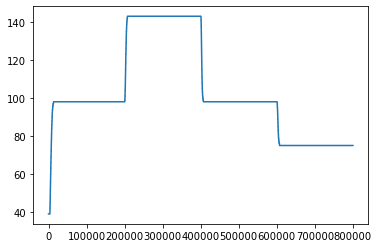

In [13]:
ice.columns
plt.plot(ice['0'])

In [54]:
def min_max_scaling(data):
    data_2= (data - np.min(data)) / (np.max(data) - np.min(data))
        
    return data_2
    

In [65]:
#ELA switches are at 0,1000, 2000 ,and 3000 years, which at 200 timesteps per year gives us switches at 0, 200k,400k,and 600k
#It could be that the initial switch at 0 is different from the others, maybe take a look?

#Finding equilibrium values between ELA switches

eq_0=ice['0'][100000]
eq_1=ice['0'][300000]
eq_2=ice['0'][500000]
eq_3=ice['0'][700000]

ice_h=list(ice['0'])

loc_eq_0=ice_h.index(eq_0)
loc_eq_1=ice_h[100000:].index(eq_1)
loc_eq_2=ice_h[300000:].index(eq_2)
loc_eq_3=ice_h[500000:].index(eq_3)


sec_0=ice['0'][0:loc_eq_0]
sec_1=ice['0'][200000:loc_eq_1+100000]
sec_2=ice['0'][400000:loc_eq_2+300000]
sec_3=ice['0'][600000:loc_eq_3+500000]

sec_0_n=min_max_scaling(sec_0)
sec_1_n=min_max_scaling(sec_1)
sec_2_n=min_max_scaling(sec_2)
sec_3_n=min_max_scaling(sec_3)

e_fold=1-1/np.exp(1)
resp_0=sec_0_n[sec_0_n==e_fold]
resp_1=sec_1_n[sec_1_n==e_fold]
resp_2=sec_2_n[sec_2_n==1-e_fold]
resp_3=sec_3_n[sec_3_n==1-e_fold]

print(resp_0)

Series([], Name: 0, dtype: float64)


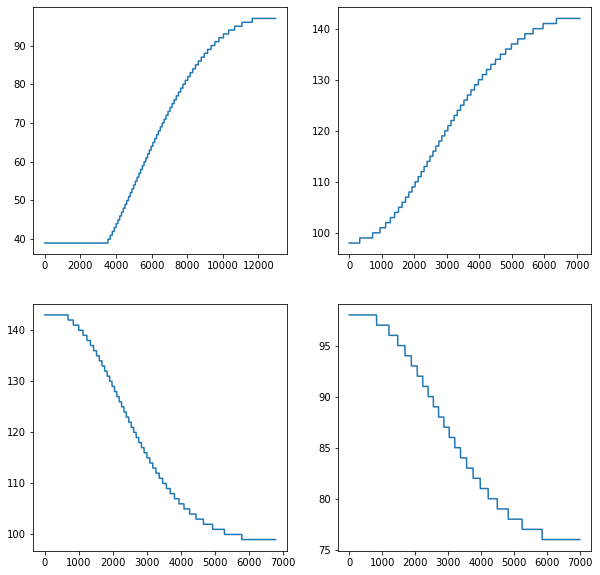

In [36]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,10))
t0=np.arange(0,len(sec_0))
t1=np.arange(0,len(sec_1))
t2=np.arange(0,len(sec_2))
t3=np.arange(0,len(sec_3))
ax[0,0].plot(t0,sec_0)
ax[0,1].plot(t1,sec_1)
ax[1,0].plot(t2,sec_2)
ax[1,1].plot(t3,sec_3)

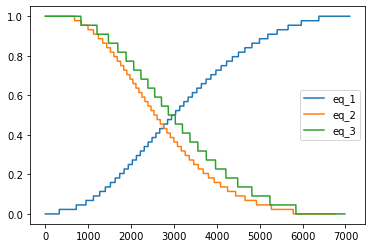

In [64]:
#plt.plot(t0,sec_0_n,label="eq_0")
plt.plot(t1,sec_1_n,label="eq_1")
plt.plot(t2,sec_2_n,label="eq_2")
plt.plot(t3,sec_3_n,label="eq_3")
plt.legend()

